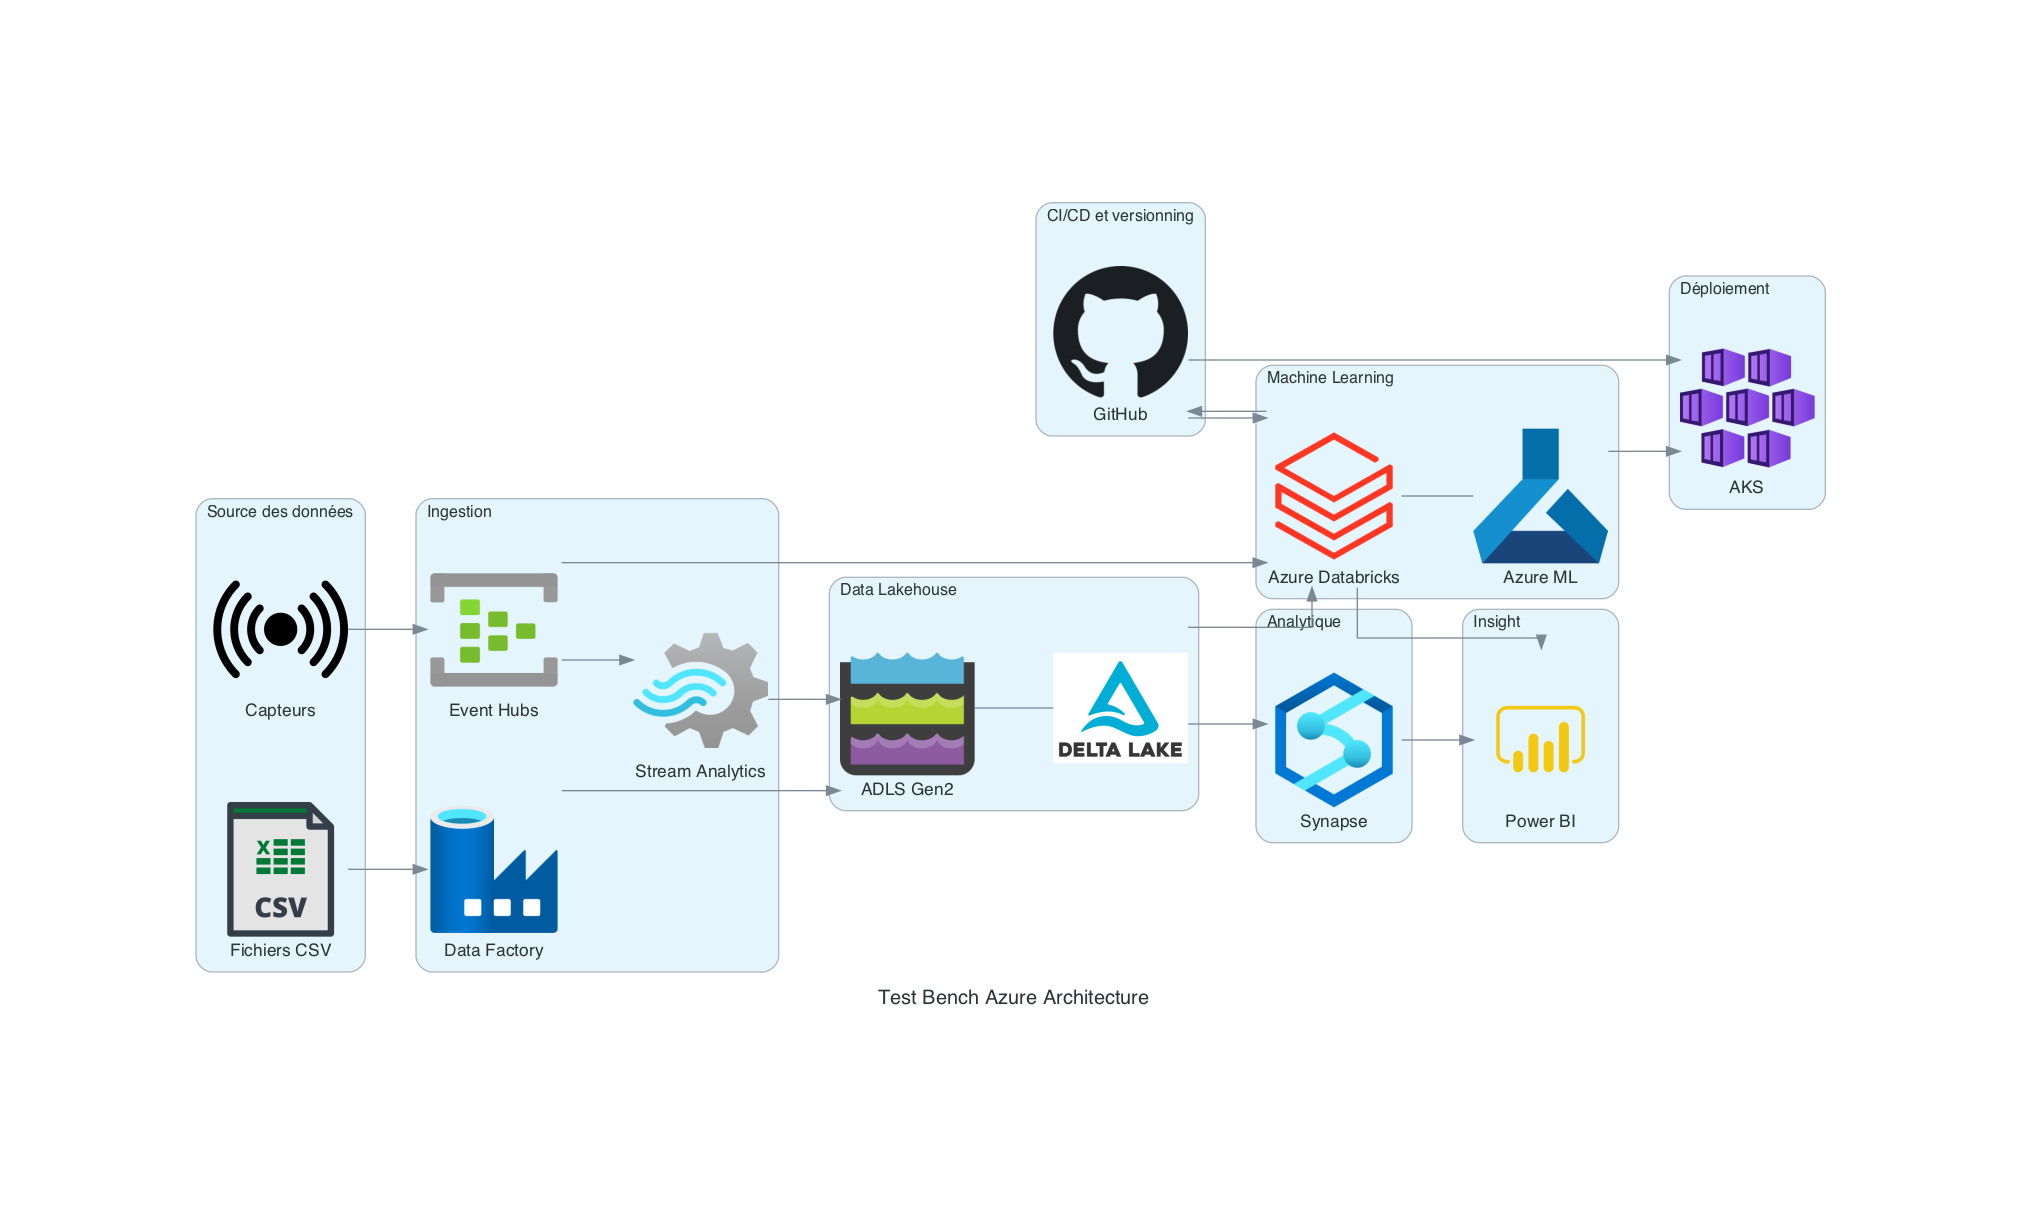

In [1]:
from diagrams import Cluster, Diagram
from diagrams.custom import Custom
from urllib.request import urlretrieve

from diagrams.azure.database import DataFactory
from diagrams.azure.analytics import EventHubs
from diagrams.azure.analytics import StreamAnalyticsJobs
from diagrams.azure.storage import DataLakeStorage

from diagrams.azure.analytics import Databricks
from diagrams.azure.ml import MachineLearningServiceWorkspaces

from diagrams.onprem.analytics import PowerBI
from diagrams.azure.analytics import SynapseAnalytics

from diagrams.onprem.vcs import Github
from diagrams.azure.compute import AKS

with Diagram("Test Bench Azure Architecture", show=False) as diag:
    
    # Custom icons
    sensor_url = "https://cdn-icons-png.flaticon.com/512/2540/2540201.png"
    sensor_icon = "sensor.png"
    urlretrieve(sensor_url, sensor_icon)
    
    csvfile_url = "https://cdn-icons-png.flaticon.com/512/180/180855.png"
    csvfile_icon = "csvfile.png"
    urlretrieve(csvfile_url, csvfile_icon)
    
    deltalake_url = "https://camo.githubusercontent.com/5535944a613e60c9be4d3a96e3d9bd34e5aba5cddc1aa6c6153123a958698289/68747470733a2f2f646f63732e64656c74612e696f2f6c61746573742f5f7374617469632f64656c74612d6c616b652d77686974652e706e67"
    deltalake_icon = "deltalake.png"
    urlretrieve(deltalake_url, deltalake_icon)



    # Clusters
    with Cluster("Déploiement"):
        aks = AKS("AKS")
    
    with Cluster("CI/CD et versionning"):
        github = Github("GitHub")
        github >> aks

    with Cluster("Insight"):
        powerBI = PowerBI("Power BI")

    with Cluster("Analytique"):
        synapse = SynapseAnalytics("Synapse")
        
        
    with Cluster("Machine Learning"):
        databricks = Databricks('Azure Databricks')
        azureML = MachineLearningServiceWorkspaces("Azure ML")
        databricks - azureML
        github << databricks
        github >> databricks >> powerBI
        azureML >> aks
    
    with Cluster("Data Lakehouse"):
        datalake = DataLakeStorage('ADLS Gen2')
        deltalake = Custom("", deltalake_icon)
        datalake - deltalake
        deltalake >> databricks
        deltalake >> synapse >> powerBI
        
    with Cluster("Ingestion"):
        eventhubs = EventHubs('Event Hubs')
        streamanal = StreamAnalyticsJobs("Stream Analytics")
        datafactory = DataFactory('Data Factory')
        eventhubs >> streamanal >> datalake
        datafactory >> datalake
        eventhubs >> databricks

    with Cluster("Source des données"):
        Custom("Capteurs", sensor_icon) >> eventhubs
        Custom("Fichiers CSV", csvfile_icon) >> datafactory

diag